## Imports

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


## Leitura da base de dados

In [2]:
df = pd.read_excel('Adidas.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Retailer         9648 non-null   object        
 1   RetailerID       9648 non-null   int64         
 2   InvoiceDate      9648 non-null   datetime64[ns]
 3   Region           9648 non-null   object        
 4   State            9648 non-null   object        
 5   City             9648 non-null   object        
 6   Product          9648 non-null   object        
 7   PriceperUnit     9648 non-null   float64       
 8   UnitsSold        9648 non-null   int64         
 9   TotalSales       9648 non-null   float64       
 10  OperatingProfit  9648 non-null   float64       
 11  OperatingMargin  9648 non-null   float64       
 12  SalesMethod      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


Não há dados não preenchidos. Sugestão de análise: retirar a coluna "RetailerID"

In [4]:
df.drop(columns = ['RetailerID'], inplace = True)

In [5]:
df.head()

,Retailer,InvoiceDate,Region,State,City,Product,PriceperUnit,UnitsSold,TotalSales,OperatingProfit,OperatingMargin,SalesMethod
0,Foot Locker,2020-02-03,Northeast,New York,New York,Women's Athletic Footwear,45.0,825,371250.0,129937.5,0.35,Outlet
1,Foot Locker,2020-02-04,Northeast,New York,New York,Men's Apparel,60.0,825,495000.0,148500.0,0.30,Outlet
2,Foot Locker,2020-02-05,Northeast,New York,New York,Women's Apparel,50.0,950,475000.0,118750.0,0.25,Outlet
3,Foot Locker,2020-02-06,Northeast,New York,New York,Men's Street Footwear,60.0,1220,732000.0,366000.0,0.50,Outlet
4,Foot Locker,2020-02-07,Northeast,New York,New York,Men's Athletic Footwear,55.0,925,508750.0,152625.0,0.30,Outlet


In [6]:
df.describe()

,PriceperUnit,UnitsSold,TotalSales,OperatingProfit,OperatingMargin
count,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,45.216625,256.930037,93250.893968,34408.018392,0.422991
std,14.705397,214.252030,141852.775230,54135.070618,0.097197
min,7.000000,0.000000,0.000000,0.000000,0.100000
25%,35.000000,106.000000,4254.500000,1921.752500,0.350000
50%,45.000000,176.000000,9576.000000,4371.420000,0.410000
75%,55.000000,350.000000,150000.000000,52062.500000,0.490000
max,110.000000,1275.000000,825000.000000,390000.000000,0.800000


In [7]:
df.columns

Index(['Retailer', 'InvoiceDate', 'Region', 'State', 'City', 'Product',
       'PriceperUnit', 'UnitsSold', 'TotalSales', 'OperatingProfit',
       'OperatingMargin', 'SalesMethod'],
      dtype='object')

In [8]:
# Renomeando algumas colunas:

df.rename(columns = {'InvoiceDate': 'Invoice Date', 'PriceperUnit': 'Unit Price', 'UnitsSold': 'Units Sold', 'TotalSales': 'Total Sales',
                     'OperatingProfit':'Operating Profit','OperatingMargin':'Operating Margin', 'SalesMethod': 'Sales Method'},
                     inplace= True)

### Matriz de correlação

C:\Users\lucas\AppData\Local\Temp\ipykernel_15656\2162337185.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = 'inferno')


<Axes: >

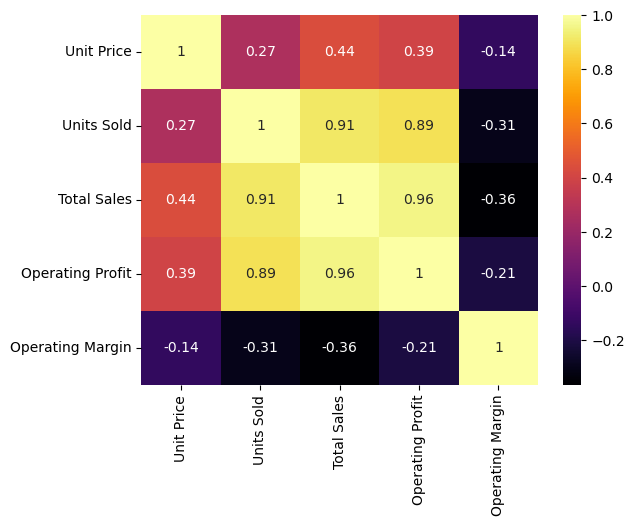

In [9]:
sns.heatmap(df.corr(), annot = True, cmap = 'inferno')

In [10]:
df.head()

,Retailer,Invoice Date,Region,State,City,Product,Unit Price,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,2020-02-03,Northeast,New York,New York,Women's Athletic Footwear,45.0,825,371250.0,129937.5,0.35,Outlet
1,Foot Locker,2020-02-04,Northeast,New York,New York,Men's Apparel,60.0,825,495000.0,148500.0,0.30,Outlet
2,Foot Locker,2020-02-05,Northeast,New York,New York,Women's Apparel,50.0,950,475000.0,118750.0,0.25,Outlet
3,Foot Locker,2020-02-06,Northeast,New York,New York,Men's Street Footwear,60.0,1220,732000.0,366000.0,0.50,Outlet
4,Foot Locker,2020-02-07,Northeast,New York,New York,Men's Athletic Footwear,55.0,925,508750.0,152625.0,0.30,Outlet


In [11]:
df['Product'].value_counts()

Men's Street Footwear        1610
Men's Athletic Footwear      1610
Women's Apparel              1608
Women's Street Footwear      1608
Women's Athletic Footwear    1606
Men's Apparel                1606
Name: Product, dtype: int64

In [12]:
df['Region'].value_counts().index

Index(['West', 'Northeast', 'Midwest', 'South', 'Southeast'], dtype='object')

## Visualização de dados

Ideias:

FILTROS: RETAILER, PRODUTO e REGIÃO

- Dados consolidados: Lucro total, total de vendas (canto superior esquerdo) (70%)

- Canto superior direito: vendas de um produto, retailer e em determinado estado ao longo do tempo (30%)
- Meio esquerdo (70%): Vendas de um produto e retailer distribuída por estados
- Meio direito (30%): pizza de sales method estratificado por produto, estado e retailer

filtro por REGIÃO / total
- Canto inferior esquerdo (50%): Se total - gráfico de barras com as vendas totais por estado; se não, indicador
- Canto inferior direito (50%): vendas cumulativas por produto (Pareto) 

### 1. Dados consolidados

In [13]:
# Lucro total por Retailer, Produto e Região


def total_profit(df, retailer, product, region):
    df_filtered = df[df['Region'] == region]
    df_filtered_aux = df_filtered[df_filtered['Product'] == product]
    df_filtered_aux_final = df_filtered_aux[df_filtered_aux['Retailer'] == retailer]

    return round(df_filtered_aux_final['Operating Profit'].sum(),3)


In [14]:

def total_sales(df, retailer, product, region):
    df_filtered = df[df['Region'] == region]
    df_filtered_aux = df_filtered[df_filtered['Product'] == product]
    df_filtered_aux_final = df_filtered_aux[df_filtered_aux['Retailer'] == retailer]

    return df_filtered_aux_final['Units'].sum()

### 2. Vendas ao longo do tempo

In [15]:
def sales_timeseries(df, retailer, product, region):
    df_filtered = df[df['Region'] == region]
    df_filtered_aux = df_filtered[df_filtered['Product'] == product]
    df_filtered_aux_final = df_filtered_aux[df_filtered_aux['Retailer'] == retailer]
    df_filtered_aux_final = df_filtered_aux_final.groupby('Invoice Date')['Units Sold'].sum().reset_index()
    
    # Criando o gráfico:

    fig = px.line(
        df_filtered_aux_final,
        x="Invoice Date",
        y="Units Sold",
        template = 'gridon',
        hover_data = ['Units Sold'],
        title=f'Sales of {product} in {region} by {retailer} over Time',
        #labels = 
    )

    return fig

In [16]:
sales_timeseries(df, "Foot Locker", "Women's Athletic Footwear", "Southeast") # Exemplo

### 3. Vendas de um produto e Retailer distribuídas por estados

In [17]:
def state_sales_distribution(df, product, retailer):
    df_filtered= df[df['Product'] == product]
    df_filtered_aux = df_filtered[df_filtered['Retailer'] == retailer]

    df_filtered_aux = df_filtered_aux.groupby('State')[['Units Sold', 'Total Sales']].sum().reset_index()

    # Gerando o gráfico:

    fig = go.Figure()
    fig.add_trace(go.Bar(x = df_filtered_aux["State"], y = df_filtered_aux["Total Sales"], name = "Total Sales"))
    fig.add_trace(go.Scatter(x=df_filtered_aux["State"], y = df_filtered_aux["Units Sold"], mode = "lines",
                            name ="Units Sold", yaxis="y2"))
    fig.update_layout(
        title = "Total Sales and Units Sold by State",
        xaxis = dict(title="State"),
        yaxis = dict(title="Total Sales", showgrid = False),
        yaxis2 = dict(title="Units Sold", overlaying = "y", side = "right"),
        template = "gridon",
        legend = dict(x=1,y=1.1)
    )

    return fig


    

In [18]:
state_sales_distribution(df, "Women's Athletic Footwear", "Foot Locker")

### 4. Pizza de sales method estratificado por produto, estado e retailer

In [32]:
def sales_method_distribution(df, product, state, retailer):
    df_filtered = df[df['State'] == state]
    df_filtered_aux = df_filtered[df_filtered['Product'] == product]
    df_filtered_aux_final = df_filtered_aux[df_filtered_aux['Retailer'] == retailer]

    pie = df_filtered_aux_final['Sales Method'].value_counts()

    # Gerando a Figura
    fig = px.pie(
        pie,
        values='Sales Method',
        names=list(pie.index),
        labels= {'Sales Method': 'Sales Method'},
        title=f'{retailer} Sales Method distribution in {state}',
        template = 'gridon'
    )

    fig.update_traces(hovertemplate='<b>%{label}</b><br>Count: %{value}<br>Percent: %{percent}')

    return pie
    

In [33]:
sales_method_distribution(df, "Women's Athletic Footwear", "New York", "Foot Locker")

Outlet      15
Online       8
In-store     1
Name: Sales Method, dtype: int64

### 5. Gráfico de barras com as vendas totais por estado (sem Filtros)

In [21]:
def state_sales(df):
    df_filtered = df.groupby('Region')['Total Sales'].sum().reset_index()

    fig = px.bar(
        df_filtered,
        x="Region",
        y="Total Sales",
        title="State Sales",
    )
    return fig

In [22]:
state_sales(df)

### 6. Gráfico de Pareto (sem filtros)

In [23]:
df_pareto = pd.DataFrame(df.groupby('Product')['Units Sold'].sum())
df_pareto.reset_index(inplace = True)
df_pareto.sort_values('Units Sold', ascending= False, inplace= True)
df_pareto['Cumulative Sales'] = df_pareto['Units Sold'].cumsum()
df_pareto['Relative Cumulative Sales'] = df_pareto['Cumulative Sales']/(df_pareto['Units Sold'].sum())

In [24]:
df_pareto

,Product,Units Sold,Cumulative Sales,Relative Cumulative Sales
2,Men's Street Footwear,593320,593320,0.239352
1,Men's Athletic Footwear,435526,1028846,0.415048
3,Women's Apparel,433827,1462673,0.590058
5,Women's Street Footwear,392269,1854942,0.748304
4,Women's Athletic Footwear,317236,2172178,0.876281
0,Men's Apparel,306683,2478861,1.000000


In [25]:
def pareto(df):
    df_pareto = pd.DataFrame(df.groupby('Product')['Units Sold'].sum())
    df_pareto.reset_index(inplace = True)
    df_pareto.sort_values('Units Sold', ascending= False, inplace= True)
    df_pareto['Cumulative Sales'] = df_pareto['Units Sold'].cumsum()
    df_pareto['Relative Cumulative Sales'] = df_pareto['Cumulative Sales']/(df_pareto['Units Sold'].sum())


    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=df_pareto['Product'],
        y=df_pareto['Units Sold'],
        name='Units Sold',
        marker_color='yellow',

    ))
    fig.add_trace(
        go.Scatter(
            x=df_pareto['Product'],
            y=df_pareto['Relative Cumulative Sales'],
            name = 'Relative Cumulative Sales',
            mode = 'lines',
            line=dict(color='blue'),
            yaxis='y2' 
        )

    )

    fig.update_layout(
        title = "Pareto: Product versus unit sold",
        xaxis = dict(title="State"),
        yaxis = dict(title="Total Sales", showgrid = False),
        yaxis2 = dict(title="Units Sold", overlaying = "y", side = "right"),
        template = "gridon",
        legend = dict(x=1,y=1.1)
    )

    return fig

In [26]:
pareto(df)

### Viabilidade pareto

In [27]:
# Análise de viabilidade de um diagrama de Pareto

df_pareto = pd.DataFrame(df.groupby('Product')['Units Sold'].sum())

In [28]:
df_pareto.reset_index(inplace = True)

In [29]:
df_pareto['Cumulative Sales'] = df_pareto['Units Sold'].cumsum()

In [30]:
df_pareto['Relative Cumulative Sales'] = df_pareto['Cumulative Sales']/(df_pareto['Units Sold'].sum())

In [31]:
df_pareto

,Product,Units Sold,Cumulative Sales,Relative Cumulative Sales
0,Men's Apparel,306683,306683,0.123719
1,Men's Athletic Footwear,435526,742209,0.299415
2,Men's Street Footwear,593320,1335529,0.538767
3,Women's Apparel,433827,1769356,0.713778
4,Women's Athletic Footwear,317236,2086592,0.841754
5,Women's Street Footwear,392269,2478861,1.000000


A constribuição dos diferentes produtos é similar sob a ótica do volume de vendas. Porém, para fins didáticos e de visualização dos dados, é viável a inserção do diagrama no dashboard